# Clustering and Symmetries in Cosmology

DESI is designed to study dark energy by measuring the expansion history of the Universe. The idea is as follows: We can measure how matter is spatially distributed at different points in the Universe's history. On the large scales DESI observes, the distribution of matter is due to gravity and how spacetime "carries" matter as it expands. Albert Einstein's theory of general relativity (GR) explains how gravity works (side note: DESI can actually test GR), so we can use it to isolate effects caused by the expanding Universe. When we study how expansion has changed over time, we see that expansion has sped up (or accelerated) over the last few billion years. Dark energy is the name we give to whatever is causing accelerated expansion. Thus any study of expansion history is also a study of dark energy.

Great, so now we understand that looking at a bunch of matter can tell us about dark energy. Finding matter sounds easy enough in principle, but doing so turns out to be difficult in practice. Why is that? Most matter in the Universe (about 84% of it) is dark matter, which, as the name implies, neither emits nor absorbs light. We have to be creative to figure out where matter is! A common approach is to look for normal matter, like we see in galaxies, and use that to estimate the distribution of total matter. This works because normal and dark matter are gravitationally attracted to each other, causing them to cluster.


<img src="images/Coma-Cluster-Justin-Ng.jpg" width="600px"/>
The Coma Cluster is a gravitationally bound collection of about 10,000 galaxies. The bright galaxies in this picture can be used to infer the distribution of dark matter and total (dark + normal) matter. Image credit: Justin Ng


### The equation of clustering

Cosmological perturbation theory is the tool we use to describe matter clustering based on observed galaxy clustering. The equation relating these quantities may look confusing at first glance, but it's really just a polynomial with more than one independent variable. Most of you have experience working with polynomials that have one independent variable, e.g. the equation of a line $f(x)= mx + b$ and the equation of a quadratic function $f(x) = ax^2 + bx + c$. Others may have worked with equations possessing two independent variables such as the equation of a circle: $x^2+y^2=r^2$. If you're used to seeing these equations, the equation for clustering won't look too bad. 

Without further ado, I present one of the many equations used to describe galaxy clustering:

$\delta_g = b_1\delta_m + \frac{b_2}{2}\left[\delta^2_m-\langle \delta^2_m \rangle\right] +\frac{b_s}{2}\left[s^2-\langle s^2 \rangle\right] + \ldots$

Let's take a minute to talk about what each piece of this means. The Greek letter delta ($\delta$) is an overdensity, a measure of how the density of the region you're looking at compares to the average density of the Universe. The subscript $g$ stands for galaxies and $m$ stands for total matter. The letter $s$ symbolizes the tidal tensor which describes the gravitational acceleration of two pieces of matter that are close to each other. Angle brackets $\langle \rangle$ mean take the average value of the quantity between them. Unknown numbers $b_1, b_2,$ and $b_s$ are called bias coefficients. Many other more complicated models exist for galaxy clustering, but the simplified one above does a good job of explaining the basic idea.

<img src="images/millennium_sim_z0_600px.jpg" width="600px"/>
This is a picture from the Millennium Simulation showing part of the cosmic web of matter in the Universe. Galaxies  (yellow) clearly lie on top of dark matter (purple). Galaxies are "positively biased" since they are located in areas where the matter density is higher than average. 

### Where did the equation come from?

The only quantity in the galaxy clustering equation we can directly measure from observations is $\delta_g$. How then do we know what terms should appear on the right-hand side of the equation? Fully answering this question requires answering two distinct questions: (a) What are the fields we should care about? (b) In what ways are those fields "allowed" to be included? (By the way, a "field" is a physical quantity that takes on a value at each point in spacetime.) 

(a) A fundamental principle of cosmological perturbation theory is that gravity is the only long-range force we care about. This means that every field we include must be connected to gravity in one way or another. One type of field that makes sense to include is the matter overdensity. We could treat normal matter and dark matter with different fields, but it's more common to put them together. Another type of field we could include is related to changes in the velocity of our matter since gravitational acceleration causes those changes. We don't include constant velocity fields because of special relativity. A tidal tensor like $s$ should be included based on what its definition. Other fields exist and could be included, but we'll stop here.

(b) Once we have the fields we care about we can think about how to use them to make a clustering equation. Symmetries give us the answer to this question. Try this: Take a piece of paper and draw a square. Now rotate that square by 90 degrees. Notice how the square looks the same as it did before you rotated it. We call this rotation one of the symmetries of the square because doing that rotation doesn't change anything. If instead you now rotate the square by some other angle that isn't a multiple of 90 degrees, you'll see that the square looks different. Those rotations are not symmetries of the square.

<img src="images/square-symmetry.png" width="600px"/>
Image credit: David Eck

When we think about how to build the clustering equation, we need to ensure that the symmetries of all our terms match. This is why the equation above is allowed to have $s^2$ but not $s$ by itself; $s^2$ and $\delta_g$ have the same symmetries while $s$ has a different type of symmetry. 

# Fit galaxy clustering models

Now that we understand clustering, let's try our hand at fitting some sample clustering equations. 

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle

matplotlib.rc('font', size=14)

## Make plots and see fits

Here we will upload some two files; one has the galaxy overdensity and the other has the total matter overdensity. These files were made from a combination of Pylians3 and Sherwood Simulation suite outputs. The Sherwood Simulation is one of many being used by DESI scientists.

In [37]:
# Open the data files
galaxy_data = pickle.load(open('clustering_data/delta_halo_N256.pkl', 'rb'))
matter_data = pickle.load(open('clustering_data/delta_matter_N256.pkl', 'rb'))

Next we're going to pick a number $N$ that helps decide how many of the over 16 million data points we plan to use for our scatter plot and fitting. This number is not the amount of points you pick, but it is related to that number. We recommend picking 4, 5 or 6.

Text(0, 0.5, '$\\delta_g$')

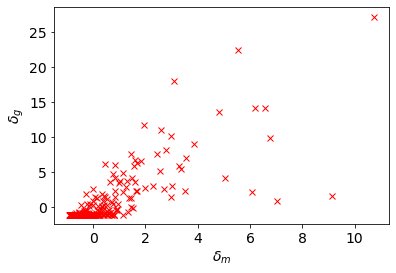

In [38]:
N = 5
M = 2**N

# The next two lines are to reduce the number of points we pick
galaxy_data = galaxy_data[::M,::M,::M]
matter_data = matter_data[::M,::M,::M]

flat_g = galaxy_data.flatten()
flat_m = matter_data.flatten()

# See a scatter plot
plt.plot(flat_m, flat_g, 'xr')
plt.xlabel('$\delta_m$')
plt.ylabel('$\delta_g$')

A lot of points are clustered in the bottom left of the plot which we expect because the average value of $\delta_m$ and $\delta_g$ is 0 in a large enough box.

Next we're going to test our fit using two different models for galaxy clustering. The first one we'll use is a simple linear model $\delta_g = b_1\delta_m + b$ and see what our best-fit parameters are. Notice that this model looks like the equation of a line $f(x) = mx+b$ where our slope is $b_1$ and "$x$" is $\delta_m$. 

In [39]:
m, b = np.polyfit(flat_m, flat_g, 1)
print('Best fit coefficients: b1={}, b={}'.format(m,b))

Best fit coefficients: b1=1.7184767783906065, b=0.025387283414700167


Try plotting the best-fit line on top of the scatter plot to see how well it does.

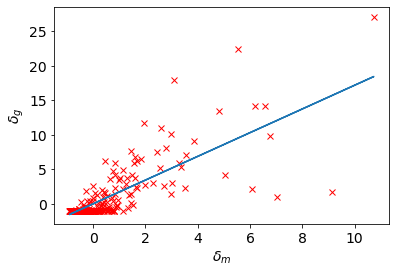

In [40]:
plt.plot(flat_m, flat_g, 'xr')
plt.xlabel('$\delta_m$')
plt.ylabel('$\delta_g$')
plt.plot(flat_m, m*flat_m+b)

This looks pretty good. Now let's test a quadratic model $\delta_g = b_1\delta_m + b_2\delta_m^2 + c$. Notice that this looks like the equation $f(x)=ax^2 +bx+c$ where "$b$" is $b_1$ and "$a$" is $b_2$. 

In [45]:
a, b, c = np.polyfit(flat_m, flat_g, 2)
print('Best fit coefficients: b1={}, b2={}, c={}'.format(b,a,c))

Best fit coefficients: b1=1.8121049778189844, b2=-0.018228197172687286, c=0.0654409603042821


How well does this quadratic function fit our data points?

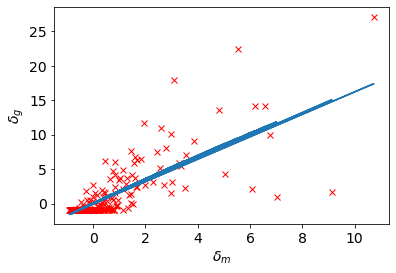

In [46]:
plt.plot(flat_m, flat_g, 'xr')
plt.xlabel('$\delta_m$')
plt.ylabel('$\delta_g$')
plt.plot(flat_m, b*flat_m + a*flat_m**2 + c)

This curve looks similar to the one before. It turns out that in our example, the relationship between $\delta_g$ and $\delta_m$ is well-described by a simple linear bias model. This is usually true on large scales; at smaller scales a linear fit doesn't do as well.

# Discussion

Hopefully now you have a sense of what galaxy clustering is, why it's useful, and how you can model-fit a clustering equation to solve for bias coefficients. There are two main differences between what we did in this notebook and what DESI scientists do in their research. First, they usually aren't fitting overdensities directly. It's more common to use statistics derived from these overdensities -- like the correlation function and power spectrum (a notebook talking about those will come later) -- and fit those instead. Second, the fitting process generally involves a type of minimization procedure we haven't discussed here. Maybe some day you will come up with even better models! 